In [10]:
import psycopg2
from sqlalchemy import create_engine
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation as animation
import numpy as np
import time
import random
import plotly.express as px
from datetime import timedelta, datetime, tzinfo, timezone,  time

In [2]:
general_path = 'E:/paper2_analysis/depth_arrival_zones'
figures_path = f'{general_path}/figures'
input_path = f'{general_path}/input'
output_path = f'{general_path}/output'

------------

In [3]:
nr_zones_sampling = 89
samplesize_nr_houses_in_zone = 50


# scenario_name = 'scen1_voorpiek'
# simulation_name = 'lk_dh_test13_5verloop_2d'
# ## start_breach_time = '2000-01-01T18:00:00'
# start_breach_time = '2000-01-01T00:00:00'


scenario_name = 'scen2_napiek'
simulation_name = 'lk_dh_test14_5verloop_38h'
# start_breach_time = '2000-01-02T04:00:00'
start_breach_time = '2000-01-01T00:00:00'

In [4]:
'zones_depth_time_df_scen2_napiek_9zones_5houses' 
print(f'{output_path}/zones_depth_time_df_{scenario_name}_{nr_zones_sampling}zones_{samplesize_nr_houses_in_zone}houses')

E:/paper2_analysis/depth_arrival_zones/output/zones_depth_time_df_scen2_napiek_89zones_50houses


## load zones_maxdepth over time

In [5]:
zones_maxdepth_time = pd.read_json(f'{output_path}/zones_depth_time_df_{scenario_name}_{nr_zones_sampling}zones_{samplesize_nr_houses_in_zone}houses.json')
zones_maxdepth_time.head(4)

,Blauwe Keet,Ooghduyne,Fort Dirksz Admiraal,Middelzand,Zwanenbalg,Fort Erfprins,Kolksluis,Noorderhaven,Liniebuurt,Grachtengordel,...,Huisduinen,Tuindorp-Oost,Oostsloot,Indische buurt-Zuid,Nieuw Den Helder Zuid-Oost,Duinbuurt,Guldemond,Vogelzand,Van Galenbuurt,Mijnendienst
2000-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-01 00:05:10,0.0,0.0,0.0,0.0,0.0,0.000000,0.185,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-01 00:10:03,0.0,0.0,0.0,0.0,0.0,0.000000,0.185,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-01 00:15:04,0.0,0.0,0.0,0.0,0.0,1.638999,0.185,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---------

### plot one water depth for every zone. 
Kan dus zijn dat voor iedere tijdstip een andere huize in deze zone te representatieve is

<AxesSubplot:>

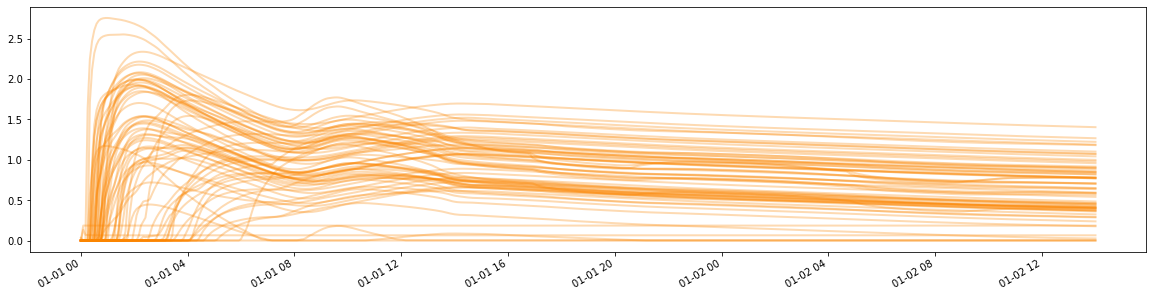

In [6]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)
# ax.set_facecolor('#e9ecef')

zones_maxdepth_time.plot(ax = ax, legend= False, color='#fb8500', alpha = 0.3, linewidth=2)

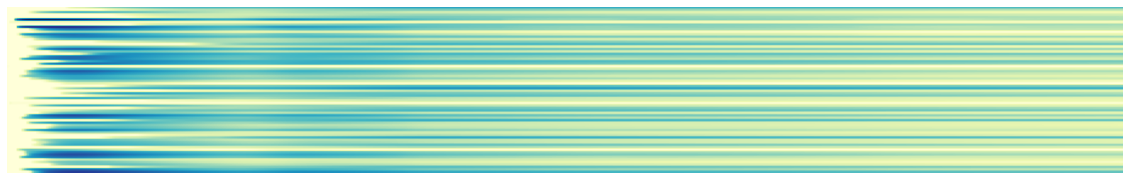

In [21]:
zones_maxdepth_time_transpose = zones_maxdepth_time.transpose()

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fdfffc","#ff9f1c", '#e71d36'])
ax.imshow(zones_maxdepth_time_transpose, cmap = 'YlGnBu')
# ax.imshow(zones_maxdepth_time_transpose, cmap = cmap)

ax.set_axis_off()

plt.savefig(f'{figures_path}/zones_depth_over_time_imshow_{scenario_name}', dpi= 600)


## count nr of zones over time

In [13]:
names_zones = zones_maxdepth_time.columns
total_nr_zones = len(names_zones)
print(f'{total_nr_zones} zones')

82 zones


In [ ]:
thresholds = {
    "0 - 0.5m": 0.5, 
    "0.5 - 1m" : 1, 
    "1 - 1.5m" : 1.5,
    "1.5 - 2m" : 2,    
    ">2m" : 10,    
} 
type(thresholds.values())

In [ ]:
for i in thresholds.values():
    print(i)

In [ ]:
threshold = 1

for index, row in zones_maxdepth_time.iterrows():
    zones_above_threshold = row[row > threshold]
    nr_zones_above_threshold = len(zones_above_threshold)
    print(f'{index}_nr_{nr_zones_above_threshold}')
